In [18]:
# This is a Time Series Stationarity study code
# The code followes this tutorial: https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/?source=post_page---------------------------

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
train = pd.read_csv('AirPassengers.csv')
train['timestamp'] = pd.to_datetime(train.Month , format = '%Y-%m')
train.index = train['timestamp']
train.drop('Month', axis=1, inplace=True)

In [21]:
train.head(5)

,#Passengers,timestamp
timestamp,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01


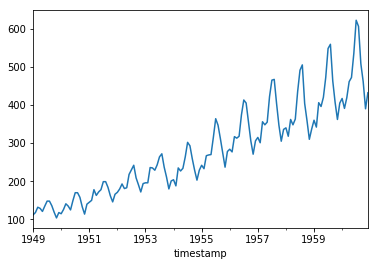

In [22]:
train['#Passengers'].plot()

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
# ADF(Augmented Dickey Fuller)
# Null Hypothesis: The series has a unit root
# Alternate Hypothesis: The series has no unit root
# ADF test has an alternate hypothesis of linear or difference stationary.

In [25]:
def adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

adf_test(train["#Passengers"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [26]:
# If test statistic < critical value, we can reject the null hypothesis(the sereis is stationary)
# If test statistic > critical value, we fail to reject the null hypothesis (the series is not stationary)
# In above example, the test statistic > critical value, which implies that the series is not stationary. 

In [27]:
from statsmodels.tsa.stattools import kpss

In [28]:
# KPSS(Kwiatkowski-Phillips-Schmidt-Shin) Test
# Null Hypothesis: The process is trend stationary
# Alternate Hypothesis: The series has a unit root(series is not stationary)
# KPSS test identifies trend-stationary in a series

In [29]:
def kpss_test(timeseries):
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output=pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

kpss_test(train['#Passengers'])

Results of KPSS Test:
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/anaconda3/envs/python36/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1708: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [30]:
# If the test statistic > the critical value, we reject the null hypothesis(series is not staionary)
# If the test statistic < the critical value, we fail to reject the null hypothesis (series is stationary)

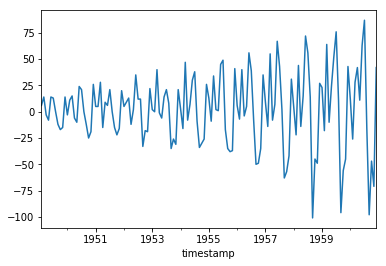

In [31]:
# Differencing
train['#Passengers_diff'] = train['#Passengers'] - train['#Passengers'].shift(1)
train['#Passengers_diff'].dropna().plot()

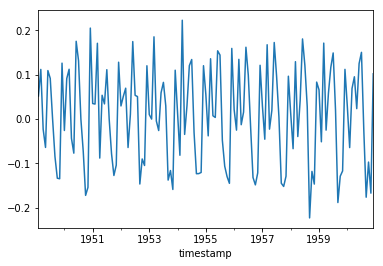

In [32]:
# Transformation: methods include: square root, log, power
import numpy as np

train['#Passengers_log'] = np.log(train['#Passengers'])
train['#Passengers_log_diff'] = train['#Passengers_log'] - train['#Passengers_log'].shift(1)
train['#Passengers_log_diff'].dropna().plot()

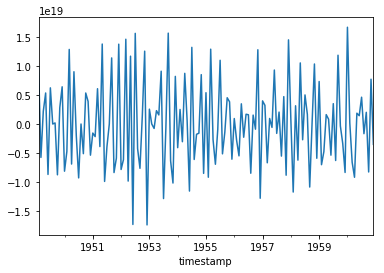

In [33]:
train['#Passengers_power'] = np.power(train['#Passengers'], 10)
train['#Passengers_power_diff'] = train['#Passengers_power'] - train['#Passengers_power'].shift(1)
train['#Passengers_power_diff'].dropna().plot()

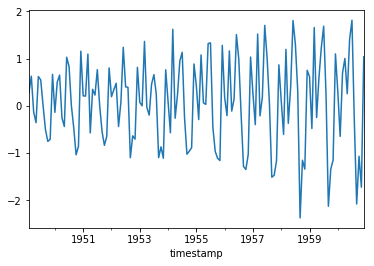

In [34]:
train['#Passengers_sqrt'] = np.sqrt(train['#Passengers'])
train['#Passengers_sqrt_diff'] = train['#Passengers_sqrt'] - train['#Passengers_sqrt'].shift(1)
train['#Passengers_sqrt_diff'].dropna().plot()

In [40]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
train_copy = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)
print(train_copy.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


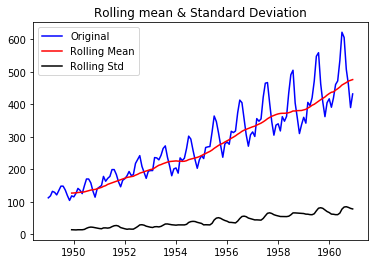

In [45]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(12).std()
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label="Rolling Std")
    plt.legend(loc='best')
    plt.title('Rolling mean & Standard Deviation')
    plt.show(block=False)
test_stationarity(train_copy)

In [ ]:
# Moving average

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN


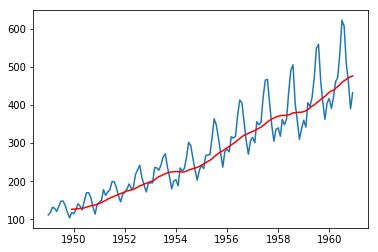

In [47]:

moving_avg = train_copy.rolling(window=12).mean()
print(moving_avg.head())
plt.plot(train_copy)
plt.plot(moving_avg, color='red')

In [48]:
train_copy_log_moving_avg_diff = train_copy - moving_avg
train_copy_log_moving_avg_diff.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [49]:
train_copy_log_moving_avg_diff.dropna(inplace=True)
train_copy_log_moving_avg_diff.head(12)

,#Passengers
Month,
1949-12-01,-8.666667
1950-01-01,-11.916667
1950-02-01,-1.583333
1950-03-01,12.666667
1950-04-01,6.166667
1950-05-01,-4.166667
1950-06-01,18.666667
1950-07-01,37.833333
1950-08-01,36.000000


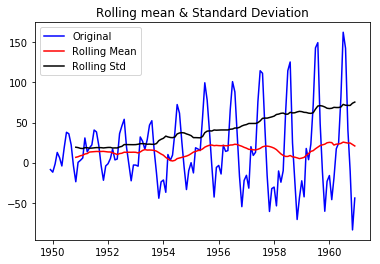

In [50]:
test_stationarity(train_copy_log_moving_avg_diff)

In [52]:
adf_test(train_copy_log_moving_avg_diff['#Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.164968
p-value                          0.022104
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [53]:
kpss_test(train_copy_log_moving_avg_diff['#Passengers'])

Results of KPSS Test:
Test Statistic            0.207295
p-value                   0.100000
Lags Used                13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/anaconda3/envs/python36/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1710: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
